In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output

In [2]:
# Function to calculate the gradient of the loss function
def gTanh(x):
    return 1 - np.tanh(x)**2

In [8]:
def gradientLossFunc(params, X, Y, x, y1, y2, margin):
    a, b, c, w11, w12, w21, w22, b1, b2 = params

    xHat = np.tanh(w11 * X + w21 * Y + b1)
    yHat = np.tanh(w12 * X + w22 * Y + b2)
    
    theta_x1 = w11 * x + w21 * y1 + b1
    theta_y1 = w12 * x + w22 * y1 + b2
    xHat1 = np.tanh(theta_x1)
    yHat1 = np.tanh(theta_y1)

    theta_x2 = w11 * x + w21 * y2 + b1
    theta_y2 = w12 * x + w22 * y2 + b2
    xHat2 = np.tanh(theta_x2)
    yHat2 = np.tanh(theta_y2)

    grad_a = grad_b = grad_c = 0
    grad_w11 = grad_w12 = grad_w21 = grad_w22 = 0
    grad_b1 = grad_b2 = 0
    #
    eVal = 0

    e = +1 * (a * xHat2 + b * yHat2 + c - margin)
    eVal   -= np.sum(e[e < 0])
    grad_a -= np.sum(xHat2[e < 0])
    grad_b -= np.sum(yHat2[e < 0])
    grad_c -= np.sum(e[e < 0])

    tmp = a * gTanh(theta_x2) * x
    grad_w11 -= np.sum(tmp[e < 0])

    tmp = b * gTanh(theta_y2) * x
    grad_w12 -= np.sum(tmp[e < 0])

    tmp = a * gTanh(theta_x2) * y2
    grad_w21 -= np.sum(tmp[e < 0])

    tmp = b * gTanh(theta_y2) * y2
    grad_w22 -= np.sum(tmp[e < 0])

    tmp = a * gTanh(theta_x2)
    grad_b1 -= np.sum(tmp[e < 0])

    tmp = b * gTanh(theta_y2)
    grad_b2 -= np.sum(tmp[e < 0])

    e = -1 * (a * xHat1 + b * yHat1 + c + margin)
    eVal   -= np.sum(e[e < 0])
    grad_a += np.sum(xHat1[e < 0])
    grad_b += np.sum(yHat1[e < 0])
    grad_c += np.sum(e[e < 0])

    tmp = a * gTanh(theta_x1) * x
    grad_w11 += np.sum(tmp[e < 0])

    tmp = b * gTanh(theta_y1) * x
    grad_w12 += np.sum(tmp[e < 0])

    tmp = a * gTanh(theta_x1) * y1
    grad_w21 += np.sum(tmp[e < 0])

    tmp = b * gTanh(theta_y1) * y1
    grad_w22 += np.sum(tmp[e < 0])

    tmp = a * gTanh(theta_x1)
    grad_b1 += np.sum(tmp[e < 0])

    tmp = b * gTanh(theta_y1)
    grad_b2 += np.sum(tmp[e < 0])
    
    clear_output(wait=True)
    plt.figure(figsize=(8, 6))

    for i in range(len(xHat)):
        plt.plot(xHat[i, :], yHat[i, :], 'c.-', linewidth=0.5, markersize=3)
        plt.plot(xHat[:, i], yHat[:, i], 'c.-', linewidth=0.5, markersize=3)
        
    plt.plot(xHat1, yHat1, 'r.-', linewidth=2)
    plt.plot(xHat2, yHat2, 'b.-', linewidth=2)
    plt.plot(x, (-c - a * x) / b, 'g-', linewidth=2)

    top = np.ones_like(x)
    bottom = (-c - a * x) / b
    xAxis = np.concatenate([x, x[::-1]])
    area = np.concatenate([bottom, top[::-1]])
    plt.fill(xAxis, area, color=[0.8, 0, 0.9])

    bottom = -np.ones_like(x)
    top = (-c - a * x) / b
    area = np.concatenate([bottom, top[::-1]])
    plt.fill(xAxis, area, color=[0.7, 0.7, 0.7])
    plt.gca().set_alpha(0.15)
    plt.axis([-1, 1, -1, 1])
    plt.axis('off')
    plt.grid(True)
    plt.title("error function:{:.3f}".format(eVal))
    plt.show()

    plt.pause(0.1)

    gradLoss = [grad_a, grad_b, grad_c, grad_w11, grad_w12, grad_w21, grad_w22, grad_b1, grad_b2]
    return eVal, gradLoss

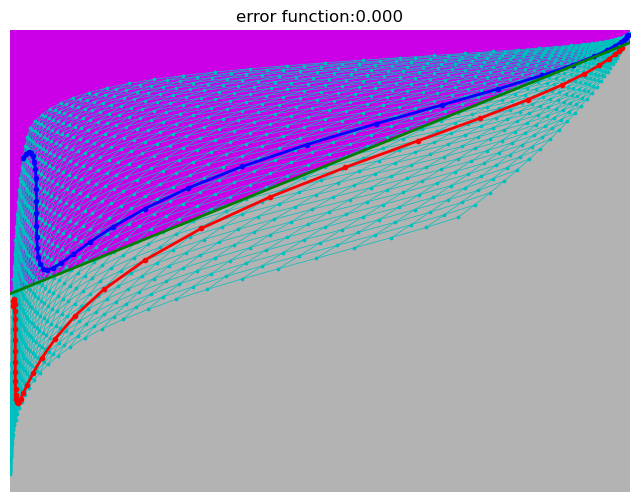

Error function is zero at iteration: 231


In [15]:
# Data
X, Y = np.meshgrid(np.arange(-1, 1.05, 0.05), np.arange(-1, 1.05, 0.05))
n = X.shape[0]

for i in range(n):
    plt.plot(X[i, :], Y[i, :], 'c.-', linewidth=0.5, markersize=3)
    plt.plot(X[:, i], Y[:, i], 'c.-', linewidth=0.5, markersize=3)

x = np.arange(-1, 1.05, 0.05)
y1 = -0.6 * np.sin(3 * x + np.pi / 2) - 0.35
y2 = -0.6 * np.sin(3 * x + np.pi / 2) + 0.25
plt.plot(x, y1, 'r.-', linewidth=2)
plt.plot(x, y2, 'b.-', linewidth=2)
plt.show()


params = [-0.8, 1, -0.5, 2, 1, 2, 1, 0, 0]
nIters = 300
g1 = 0.01 # learning rate
margin = 0 # threshold

for i in range(nIters):

    eVal, delF = gradientLossFunc(params, X, Y, x, y1, y2, margin)
    params = params - g1 * np.array(delF)
    plt.pause(0.01)
    if eVal == 0:
        print("Error function is zero at iteration: {:.0f}".format(i))
        break

